In [4]:
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load and preprocess the Titanic dataset
df = sns.load_dataset('titanic')
df.drop(['class', 'deck', 'embark_town', 'alive'], axis=1, inplace=True)
df = df.bfill()  # Backward fill missing values

# Encode categorical features
model = LabelEncoder()
df['sex'] = model.fit_transform(df['sex'])
df['who'] = model.fit_transform(df['who'])
df['adult_male'] = model.fit_transform(df['adult_male'])
df['alone'] = model.fit_transform(df['alone'])
df['embarked'] = model.fit_transform(df['embarked'])

# Filter out rows with fare > 100
df = df[df['fare'] <= 100]

# Define features and target variable
X = df.drop(['survived'], axis=1)
y = df['survived']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the AdaBoost classifier
model = AdaBoostClassifier()
model.fit(x_train, y_train)

# Predict on training and testing sets
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

# Print evaluation metrics
print("*****Train*****")
print(f'Train Accuracy: {accuracy_score(y_train, train_pred)}')
print(f'Train Precision: {precision_score(y_train, train_pred)}')
print(f'Train Recall: {recall_score(y_train, train_pred)}')
print(f'Train F1 Score: {f1_score(y_train, train_pred)}')

print("\n*****Test*****")
print(f'Test Accuracy: {accuracy_score(y_test, test_pred)}')
print(f'Test Precision: {precision_score(y_test, test_pred)}')
print(f'Test Recall: {recall_score(y_test, test_pred)}')
print(f'Test F1 Score: {f1_score(y_test, test_pred)}')


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


*****Train*****
Train Accuracy: 0.8498293515358362
Train Precision: 0.813953488372093
Train Recall: 0.7847533632286996
Train F1 Score: 0.7990867579908676

*****Test*****
Test Accuracy: 0.7976190476190477
Test Precision: 0.6705882352941176
Test Recall: 0.7125
Test F1 Score: 0.6909090909090909


# Correlation Analysis
Correlation analysis helps to understand the relationships between numerical features. For this, we’ll calculate the correlation matrix and visualize it.

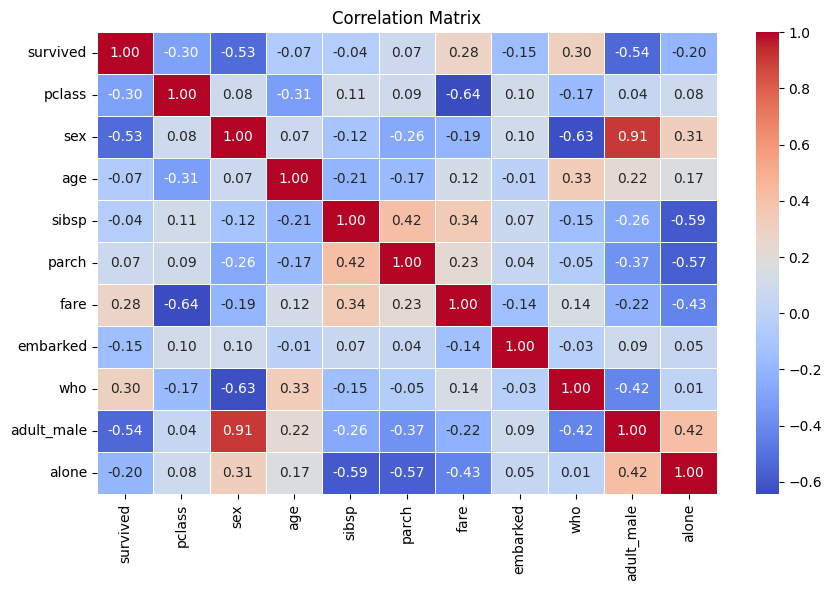

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Hypothesis Testing
We’ll conduct hypothesis tests to understand the impact of categorical variables on survival. Specifically, we can use the Chi-Square Test to assess the relationships between categorical variables and survival.

## Hypothesis Testing: Gender vs. Survival
Null Hypothesis (H0): Gender has no effect on survival (i.e., survival rates are independent of gender).
Alternative Hypothesis (H1): Gender has an effect on survival (i.e., survival rates are dependent on gender).

In [6]:
import scipy.stats as stats

# Create a contingency table for gender vs. survival
contingency_table_gender = pd.crosstab(df['sex'], df['survived'])

# Perform Chi-Square Test
chi2_gender, p_gender, dof_gender, expected_gender = stats.chi2_contingency(contingency_table_gender)

print(f"Chi-Square Statistic (Gender): {chi2_gender}")
print(f"P-Value (Gender): {p_gender}")

if p_gender < 0.05:
    print("Reject the null hypothesis: There is a significant difference in survival rates between genders.")
else:
    print("Fail to reject the null hypothesis: No significant difference in survival rates between genders.")


Chi-Square Statistic (Gender): 228.91948886641828
P-Value (Gender): 1.0256198232139585e-51
Reject the null hypothesis: There is a significant difference in survival rates between genders.


# Hypothesis Testing: Class vs. Survival
Null Hypothesis (H0): Passenger class has no effect on survival (i.e., survival rates are independent of class).
Alternative Hypothesis (H1): Passenger class has an effect on survival (i.e., survival rates are dependent on class).

In [7]:
# Create a contingency table for class vs. survival
contingency_table_class = pd.crosstab(df['pclass'], df['survived'])

# Perform Chi-Square Test
chi2_class, p_class, dof_class, expected_class = stats.chi2_contingency(contingency_table_class)

print(f"\nChi-Square Statistic (Class): {chi2_class}")
print(f"P-Value (Class): {p_class}")

if p_class < 0.05:
    print("Reject the null hypothesis: There is a significant difference in survival rates across different classes.")
else:
    print("Fail to reject the null hypothesis: No significant difference in survival rates across different classes.")



Chi-Square Statistic (Class): 78.59889845490332
P-Value (Class): 8.559848115168626e-18
Reject the null hypothesis: There is a significant difference in survival rates across different classes.


# Summary of Analysis:
# Correlation Analysis:

Correlation Matrix: Helps identify the strength and direction of relationships between numerical features.
Hypothesis Testing:

Chi-Square Test: Assesses whether categorical variables (e.g., gender, class) are associated with survival rates.
This analysis provides insights into how different factors might influence survival rates and how variables relate to each other.